In [33]:
%matplotlib inline

In [2]:
from to_nwb.mworks.data import MWKFile
from to_nwb.utils import check_equal
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
from tqdm import tqdm

In [3]:
f = MWKFile('/Users/bendichter/Desktop/Movshon/data/Data_BlackRock_MWorks_forBenDichter/HT_V4IT_Textures2_200stimoff_180716_001.mwk/HT_V4IT_Textures2_200stimoff_180716_001.mwk')
f.open()
all_events = f.get_events()
soup = BeautifulSoup(all_events[8].data[38:], "lxml")
print(soup.prettify())

<html>
 <body>
  <monkeyml _line_number="2" version="1.0">
   <filters _line_number="3" tag="Filters">
    <filter _line_number="4" in1="eye_h_calibrated" out1="eye_h" type="boxcar_filter_1D" width_samples="5">
    </filter>
    <filter _line_number="5" in1="eye_v_calibrated" out1="eye_v" type="boxcar_filter_1D" width_samples="5">
    </filter>
    <filter _line_number="6" eye_state="saccade" eyeh_calibrated="eye_h" eyev_calibrated="eye_v" saccade_entry_speed="60" saccade_exit_speed="20" type="basic_eye_monitor" width_samples="5">
    </filter>
   </filters>
   <io_devices _line_number="8" tag="IO Devices">
    <iodevice _line_number="9" alt="" id="" priority="" tag="Setup3 ITC18" type="ITC18">
     <iochannel _line_number="10" capability="ITC18_ADC_INPUT4" data_interval="1ms" data_type="analog" direction="input" range_max="10" range_min="-10" resolution="16" synchrony="hardware_timed_synchronous" tag="Eye_H_channel" update_interval="3ms" variable="eye_h_raw">
     </iochannel>
     <i

In [4]:
f.reverse_codec

{'#allowAltFailover': 4,
 '#announceAssertion': 17,
 '#announceBlock': 16,
 '#announceCalibrator': 12,
 '#announceCurrentState': 14,
 '#announceMessage': 6,
 '#announceSound': 11,
 '#announceStimulus': 10,
 '#announceTrial': 15,
 '#experimentLoadProgress': 8,
 '#loadedExperiment': 9,
 '#mainScreenInfo': 19,
 '#privateCalibratoreyeCalibrator': 122,
 '#realtimeComponents': 21,
 '#requestCalibrator': 13,
 '#serverName': 18,
 '#state_system_mode': 5,
 '#stimDisplayUpdate': 7,
 '#warnOnSkippedRefresh': 20,
 'ASwapCount': 112,
 'BehaviorOC': 68,
 'ITI': 77,
 'OSPrime_ContrStm_index': 107,
 'OSPrime_stm_index': 105,
 'OS_ContrStm_index': 108,
 'OS_FPrint_index_A': 109,
 'OS_FPrint_index_B': 110,
 'OS_Stim_Flag': 102,
 'OS_protocol_presentation_counter': 97,
 'OS_stim_counter': 103,
 'OS_stm_index': 106,
 'OS_swap_pos': 104,
 'PlexonHoldTime': 93,
 'Position_DN': 64,
 'Position_UP': 65,
 'Position_independentOfProtocol_X': 66,
 'Position_independentOfProtocol_Y': 67,
 'RSVP_stim_index_var06_01

In [5]:
events = f.get_events()

In [71]:
all_data = {}
for label, num in tqdm(f.reverse_codec.items()):
        event_data = list(zip(*[(event.data, event.time) for event in events if event.code == num]))
        if any(event_data):
            all_data[label] = {}
            all_data[label]['data'] = event_data[0]
            all_data[label]['tt'] = event_data[1]
        else:
            print('no data for ' + label)

 32%|███▏      | 38/118 [01:00<02:07,  1.59s/it]

no data for eye_v_raw


 61%|██████    | 72/118 [01:53<01:12,  1.58s/it]

no data for eye_h_calibrated


 66%|██████▌   | 78/118 [02:03<01:03,  1.58s/it]

no data for eye_v_calibrated


 87%|████████▋ | 103/118 [02:46<00:24,  1.62s/it]

no data for stm_selector_y


 92%|█████████▏| 108/118 [02:54<00:16,  1.62s/it]

no data for stm_selector_x


 94%|█████████▍| 111/118 [02:59<00:11,  1.62s/it]

no data for eye_h_raw


100%|██████████| 118/118 [03:10<00:00,  1.62s/it]


In [70]:
list(event_data)

[]

In [87]:
single_data = {key: value for (key, value) in all_data.items() 
               if (len(value['tt']) == 4) and check_equal(value['data'])}

In [96]:
single_data = {}
time_data = {}
time_no_data = {}

for (key, value) in all_data.items():
    if check_equal(value['data']):
        if len(value['tt']) == 4:
            single_data[key] = {}
            single_data[key]['data'] = value['data'][0]
            single_data[key]['tt'] = value['tt']
        else:
            time_no_data[key] = {}
            time_no_data[key]['data'] = value['data'][0]
            time_no_data[key]['tt'] = value['tt']
    else:
        time_data[key] = {}
        time_data[key]['data'] = value['data']
        time_data[key]['tt'] = value['tt']

In [98]:
time_no_data.keys()

dict_keys(['spike_rate', 'spikes', 'wordSent', 'OS_stim_counter', 'fixation_point_size', 'swap_pos'])

In [103]:
single_data.keys()

dict_keys(['PlexonHoldTime', 'ignore_time', 'stimon_delay', 'show_N_images', 'imagesetsize_var06', 'stimon_time', 'stimoff_time', 'ITI', 'number_repeats_Nicole', 'number_repeats_Var06', 'number_repeats_Var00', 'number_repeats_Nuo', 'stm_size_nicole', 'stm_size_nuo', 'Position_independentOfProtocol_Y', 'Position_independentOfProtocol_X', 'Position_UP', 'distractor_random_pos_y', 'presuccess_delay', 'vertical_refresh', 'spikeWaveform', '#privateCalibratoreyeCalibrator', 'OS_ContrStm_index', 'OS_protocol_presentation_counter', 'stm_selector_gain', '#experimentLoadProgress', 'SwapGo', 'fixation_width', 'image_accept', 'fixation_pos_y_c', 'OS_stm_index', 'fixation_pos_x_c', 'random_number', 'fixation_point_size_man', 'fg', 'OS_Stim_Flag', 'fb', 'fr', 'flicker_time', 'swapped_stim_counter', 'flicker_num', 'response_time_window', 'flicker', 'OS_swap_pos', 'swap_win_width', 'random_stmOn_time', 'debuggerStep', 'swap_win_pos_y', 'debuggerRunning', 'swap_win_pos_x', 'debuggerActive', 'hit_count'

In [83]:
min(all_data['eye_h']['tt'])

1143591234740

In [77]:
[len(d['tt']) for d in all_data.values()]

[380,
 4,
 1178,
 1178,
 4,
 4,
 4,
 1345,
 1159,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 192,
 192,
 1500,
 4,
 4,
 4,
 4,
 4,
 4,
 24,
 1177,
 4,
 627893,
 4,
 139,
 6,
 4,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 198486,
 4,
 4,
 4,
 2350,
 4,
 4,
 380,
 4,
 4,
 2350,
 2350,
 1177,
 4,
 26919,
 4,
 11091,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 193,
 4,
 4,
 4,
 4,
 4,
 4,
 26919,
 4,
 4,
 627893,
 4,
 788,
 4,
 139,
 4,
 4,
 4,
 8,
 4606,
 372,
 1178,
 627893,
 4,
 4,
 193,
 5,
 4,
 2743,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 193,
 4,
 53,
 4,
 26919]

In [9]:
[x for x in all_data.keys() if 'eye' in x]

['#privateCalibratoreyeCalibrator', 'eye_v', 'eye_in_window', 'eye_h']

In [28]:
td = timedelta(seconds=all_events[0].time/1000000)

(array([104.,   1.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([4.0000000e+00, 6.2828900e+03, 1.2561780e+04, 1.8840670e+04,
        2.5119560e+04, 3.1398450e+04, 3.7677340e+04, 4.3956230e+04,
        5.0235120e+04, 5.6514010e+04, 6.2792900e+04, 6.9071790e+04,
        7.5350680e+04, 8.1629570e+04, 8.7908460e+04, 9.4187350e+04,
        1.0046624e+05, 1.0674513e+05, 1.130240

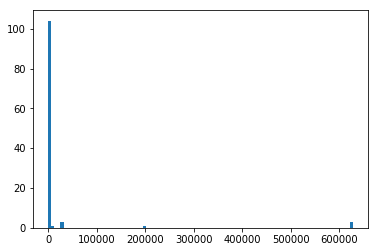

In [36]:
plt.hist([len(d['tt']) for d in all_data.values()], 100)